# Ultimate Take Home Challenge
Chuck Tucker

## Part 1: Exploratory Logins

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('logins.json')

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
def get_quarter(x):
    if x > 45:
        return 0
    if x > 30:
        return 45
    if x > 15:
        return 30
    else:
        return 15

In [6]:
df.loc[:,'hour'] = df.login_time.dt.hour
df.loc[:,'quarter'] = df.login_time.dt.minute.apply(get_quarter)

In [7]:
import matplotlib.pyplot as plt

In [8]:
df.head()

,login_time,hour,quarter
0,1970-01-01 20:13:18,20,15
1,1970-01-01 20:16:10,20,30
2,1970-01-01 20:16:37,20,30
3,1970-01-01 20:16:36,20,30
4,1970-01-01 20:26:21,20,30


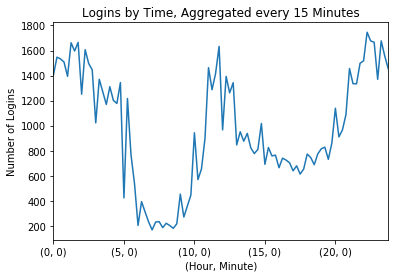

In [9]:
_ = df.groupby(['hour', 'quarter']).login_time.count().plot()
_ = plt.xlabel('(Hour, Minute)')
_ = plt.ylabel('Number of Logins')
_ = plt.title('Logins by Time, Aggregated every 15 Minutes')

There is a minimum of logins around 7 to 8 am, with another lull around 5 pm. This is likely when people are traveling to and from work. There are two main peaks for logins: around noon and at night from about 10 pm to 2 am. 

## Part 2: Experiment and Metrics

1. I would choose driver GPS location as the key metric to determine success of the decision. This would have to be monitored over time, so taking GPS measurements every few mintues (say every 15 mintues or so) would help determine this.

2. This would be a classic A/B test. I would count the number of times a driver went through a toll booth. This shows the number of times a driver crosses between the cities. This should be counted using a set mount of time, for instance daily counts. After the toll reimbursement, continue to count the number of times drivers go through the toll booth. Compare the daily averages to see if the number of crossings is significantly different after implementing the reimbursement. Another option would be to only reimburse certain drivers and compare the number of crossings between the reimbursed and non-reimbursed group.

3. Recommendations would be based on the results of the statistical analysis. They would need to know the probability that the observed difference was due to the reimbursement or random chance. 

## Part 3: Predictive Modeling

In [10]:
import json

data = json.load(open('ultimate_data_challenge.json', 'r'))
cols = data[0].keys()

In [11]:
ult = pd.DataFrame(columns=cols)
for i in data:
    ult = pd.concat([ult, pd.DataFrame(i, index=[0])], ignore_index=True)

In [12]:
ult.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [13]:
ult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null object
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null object
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: float64(6), object(6)
memory usage: 4.6+ MB


In [14]:
ult.dropna(how='any', inplace=True)

In [15]:
ult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
city                      41445 non-null object
trips_in_first_30_days    41445 non-null object
signup_date               41445 non-null object
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
last_trip_date            41445 non-null object
phone                     41445 non-null object
surge_pct                 41445 non-null float64
ultimate_black_user       41445 non-null object
weekday_pct               41445 non-null float64
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
dtypes: float64(6), object(6)
memory usage: 4.1+ MB


In [16]:
ult.shape

(41445, 12)

In [17]:
ult.loc[:,'last_trip_date'].apply(lambda x: x[:4]).value_counts()

2014    41445
Name: last_trip_date, dtype: int64

Data does not extend beyond 2014

In [18]:
import seaborn as sns

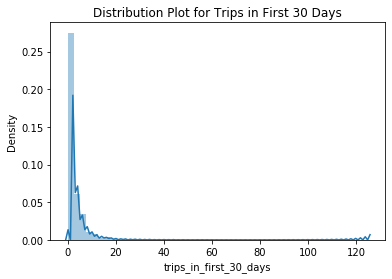

In [19]:
_ = sns.distplot(ult.loc[:,'trips_in_first_30_days'])
_ = plt.title('Distribution Plot for Trips in First 30 Days')
_ = plt.ylabel('Density')

The number of trips in the first 30 days is right skewed. Most people had fewer than 20 trips, with many outliers past that. The boxplot below also illustrates this.

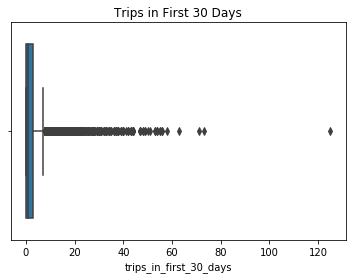

In [20]:
_ = sns.boxplot(ult.loc[:,'trips_in_first_30_days'])
_ = plt.title('Trips in First 30 Days')

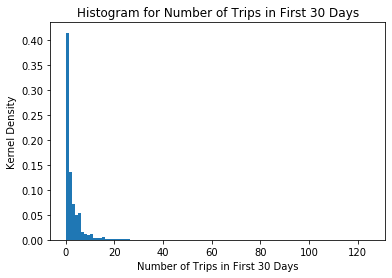

In [21]:
_ = plt.hist(ult.trips_in_first_30_days, density=True, bins=100)
_ = plt.title('Histogram for Number of Trips in First 30 Days')
_ = plt.xlabel('Number of Trips in First 30 Days')
_ = plt.ylabel('Kernel Density')

In [22]:
ult = ult[ult.trips_in_first_30_days <= 20]

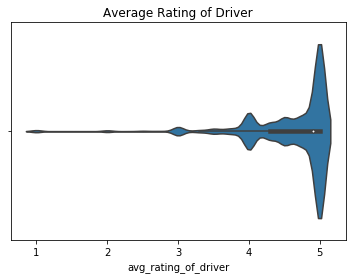

In [23]:
_ = sns.violinplot(ult.loc[:,'avg_rating_of_driver'])
_ = plt.title('Average Rating of Driver')

The vast majority of ratings are positive (5 or 4). There are some lower ratings, and this may be a good predictor for retention. Given the range in only 1-5, keeping all values here.

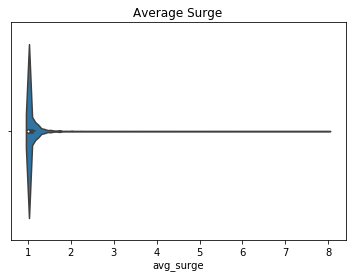

In [24]:
_ = sns.violinplot(ult.loc[:,'avg_surge'])
_ = plt.title('Average Surge')

Similarly to the ratings, most of the values are grouped together with a few 'extreme' values. Given the small range 1-8, all values will be kept. At this point, it appears essential that the data should be normalized prior to any machine learning.

In [25]:
ult.phone.value_counts()

iPhone     29065
Android    12026
Name: phone, dtype: int64

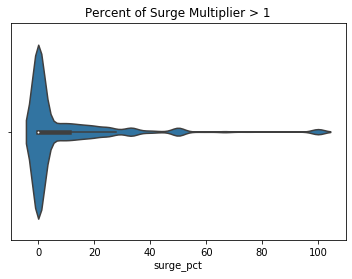

In [26]:
_ = sns.violinplot(ult.loc[:,'surge_pct'])
_ = plt.title('Percent of Surge Multiplier > 1')

We are again seeing a fairly skewed distribution. Model performance could be affected by these issues. If the model doesn't perform well initially, it could be beneficial to remove more of the extreme values from each of the features.

In [27]:
ult.ultimate_black_user.value_counts()

False    25411
True     15680
Name: ultimate_black_user, dtype: int64

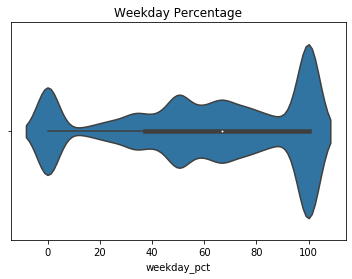

In [28]:
_ = sns.violinplot(ult.loc[:,'weekday_pct'])
_ = plt.title('Weekday Percentage')

Weekday percentage is a little more evenly distributed, meaning not a lot of cleaning is needed.

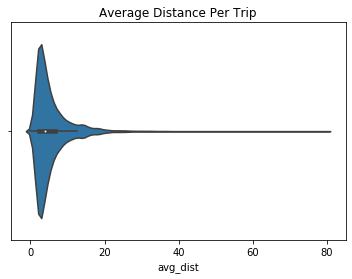

In [29]:
_ = sns.violinplot(ult.loc[:,'avg_dist'])
_ = plt.title('Average Distance Per Trip')

Like many of the other plots, there is the potential here for skewness affecting the results. Because this appears to be slightly worse than some of the others, let's create some more plots to visualize this.

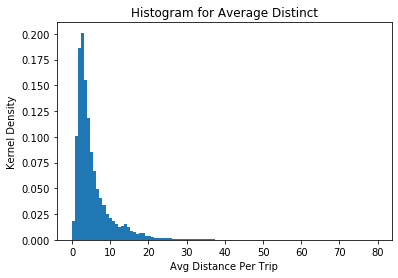

In [30]:
_ = plt.hist(ult.avg_dist, density=True, bins=100)
_ = plt.title('Histogram for Average Distinct')
_ = plt.xlabel('Avg Distance Per Trip')
_ = plt.ylabel('Kernel Density')

It looks ike 35 would be a good cutoff.

In [31]:
ult = ult[ult.avg_dist <= 35]

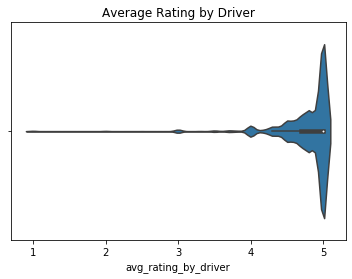

In [32]:
_ = sns.violinplot(ult.loc[:,'avg_rating_by_driver'])
_ = plt.title('Average Rating by Driver')

Similar to the other ratings, most are positive with a few negative. The negative reviews might be important, so not removing these.

In [33]:
ult.loc[:,'signup_date'] =  pd.to_datetime(ult.signup_date, infer_datetime_format=True)
ult.loc[:,'last_trip_date'] =  pd.to_datetime(ult.last_trip_date, infer_datetime_format=True)

In [34]:
ult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40972 entries, 0 to 49998
Data columns (total 12 columns):
city                      40972 non-null object
trips_in_first_30_days    40972 non-null object
signup_date               40972 non-null datetime64[ns]
avg_rating_of_driver      40972 non-null float64
avg_surge                 40972 non-null float64
last_trip_date            40972 non-null datetime64[ns]
phone                     40972 non-null object
surge_pct                 40972 non-null float64
ultimate_black_user       40972 non-null object
weekday_pct               40972 non-null float64
avg_dist                  40972 non-null float64
avg_rating_by_driver      40972 non-null float64
dtypes: datetime64[ns](2), float64(6), object(4)
memory usage: 4.1+ MB


In [35]:
ult.reset_index(inplace=True, drop=True)

In [36]:
# to find retention at 6 months after signup, need the amount of time in months
# between signup and last ride
def get_months(a, b):
    return a.month - b.month

In [37]:
# get the time in months between signup
tds = []
i = 0
while i < ult.shape[0]:
    ult.loc[i, 'td'] = get_months(ult.loc[i, 'last_trip_date'], ult.loc[i, 'signup_date'])
    i += 1

In [38]:
ult.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,td
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,4.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,5.0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2.0


In [39]:
# 30 days (1 month) or less at 6 months, means 5 months or more after signup
def is_retained(x):
    if x >= 5:
        return 1
    else:
        return 0

In [40]:
ult.loc[:,'retained'] = ult.td.apply(is_retained)

In [41]:
ult.head(20)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,td,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,4.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,5.0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2.0,0
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,5.0,1
6,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,0.0,0
7,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,1.0,0
8,Winterfell,1,2014-01-13,5.0,1.00,2014-05-30,iPhone,0.0,True,100.0,4.28,4.9,4.0,0
9,Winterfell,3,2014-01-06,4.0,1.00,2014-01-10,iPhone,0.0,False,100.0,3.81,5.0,0.0,0


In [42]:
ult.retained.value_counts()

0    24232
1    16740
Name: retained, dtype: int64

In [43]:
print('The precentage of retained riders is {}'.format(ult.retained.value_counts()[1]/
                                                       (ult.retained.value_counts()[1]+
                                                        ult.retained.value_counts()[0])))

The precentage of retained riders is 0.40857170750756616


The classes are relatively balanced if using active riders at 6 months as anyone who has taken a ride within 30 days prior to the 6 month mark (5 months).

In [44]:
# get dummies for categorical variables
ult = pd.get_dummies(ult, columns=['city', 'phone', 'ultimate_black_user'], drop_first=True)

In [45]:
ult.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,td,retained,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,5.0,1,1,0,1,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,4.0,0,0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0.0,0,0,0,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,5.0,1,1,0,1,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,2.0,0,0,1,0,0


In [46]:
# setup features/target
target = ult.retained

# remove the date columns and the two columns associated with the target
features = ult.drop(labels=['signup_date', 'last_trip_date', 'td', 'retained'], axis='columns')
feature_names = features.columns

In [47]:
features.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,1,0,0


In [48]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
features = scaler.fit_transform(features)

In [50]:
features.shape

(40972, 11)

In [51]:
feature_names.shape

(11,)

In [52]:
# inspect the scaler results
features[0,:]

array([ 0.51722291,  0.16078649,  0.12975763,  0.35173416, -0.42744147,
       -0.3610649 ,  0.54981315,  1.93460036, -0.92758754,  0.64327492,
        1.27300073])

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [54]:
# split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, 
                                                    random_state=21, stratify=target)

In [55]:
# build the model
logreg = LogisticRegression(solver='lbfgs', class_weight='balanced', random_state=42)

# fit the model
logreg.fit(X_train, y_train)

# generate predictions
y_pred = logreg.predict(X_test)

In [56]:
# print the accuracy
print('The training accuracy was: {}'.format(logreg.score(X_train, y_train)))
print('The test accuracy was: {}'.format(logreg.score(X_test, y_test)))

The training accuracy was: 0.6973849372384937
The test accuracy was: 0.6977709079075821


In [57]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve

In [58]:
# print the confusion matrix
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
dr = tp / (tp + fn)
fpr = fp / (fp + tn)
print('True Negatives: {}'.format(tn))
print('False Positives: {}'.format(fp))
print('False Negatives: {}'.format(fn))
print('True Positives: {}'.format(tp))

[[5239 2031]
 [1684 3338]]
True Negatives: 5239
False Positives: 2031
False Negatives: 1684
True Positives: 3338


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      7270
           1       0.62      0.66      0.64      5022

    accuracy                           0.70     12292
   macro avg       0.69      0.69      0.69     12292
weighted avg       0.70      0.70      0.70     12292



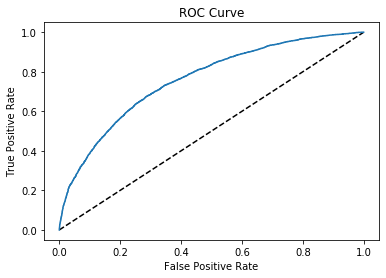

In [60]:
# generate probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# unpack into false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

_ = plt.plot([0,1], [0,1], 'k--')
_ = plt.plot(fpr, tpr)
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')

In [61]:
# compute the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.7592691743673093


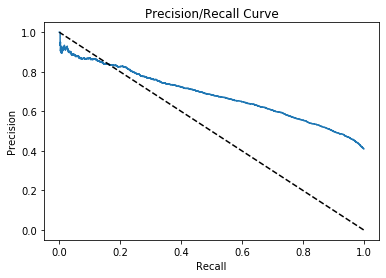

In [62]:
# plot the precision/recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

_ = plt.plot(recall, precision)
_ = plt.plot([1,0], [0,1], 'k--')
_ = plt.xlabel('Recall')
_ = plt.ylabel('Precision')
_ = plt.title('Precision/Recall Curve')

In [63]:
# print the coefficients for understanding feature importance
feat = pd.DataFrame({'feature': feature_names, 'coefficients': logreg.coef_[0]})
feat.loc[:,'abs_c'] = abs(feat.coefficients)
feat.sort_values('abs_c', ascending=False)

,feature,coefficients,abs_c
7,city_King's Landing,0.698448,0.698448
9,phone_iPhone,0.495052,0.495052
10,ultimate_black_user_True,0.432927,0.432927
0,trips_in_first_30_days,0.397683,0.397683
8,city_Winterfell,0.268097,0.268097
5,avg_dist,-0.170987,0.170987
6,avg_rating_by_driver,-0.080192,0.080192
3,surge_pct,0.069741,0.069741
1,avg_rating_of_driver,-0.037406,0.037406
2,avg_surge,-0.033270,0.033270


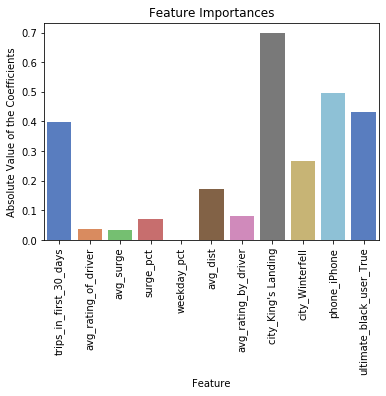

In [64]:
_ = sns.barplot(x='feature', y='abs_c', data=feat, palette='muted')
_ = plt.title('Feature Importances')
_ = plt.xlabel('Feature')
_ = plt.ylabel('Absolute Value of the Coefficients')
_ = plt.xticks(rotation=90)

### Discussion of Results

After some basic cleaning, the logistic regression model was able to predict with about 70% accuracy if riders would be retained after 6 months. This is not the best accuracy, but it could provide some use. Analysis of feature importances suggest that the city, phone, ultimate black user, and number of trips in the first 30 days were most important in predicting retention. 

This would allow the company to potentially setup an A/B testing situation in which those areas were targeted. This is an actionable response to this result, though I would warn against investing too much time and resources, as the model did not perform as well on the F1 score for the positive (retained) class. It would be important to do a return on investment analysis to determine if a target marketing campaign would be worth it.